# The dataset is having fields in basically 4 categories: People, Products, promotions and place using which we have to find clusters within the dataset.

# People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

# Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

# Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

# Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [78]:
path = r'E:/kaggle/Customer_segmentation/marketing_campaign.csv'

In [79]:
df = pd.read_csv(path,sep="\t")

In [80]:
pd.set_option("display.max_columns",None)

In [81]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [82]:
df=df.drop("ID",1)

### Handling missing values

In [83]:
df.isnull().mean()*100

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [84]:
df.shape

(2240, 28)

In [85]:
df=df.dropna()

In [86]:
df.shape

(2216, 28)

In [87]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [88]:
df.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [89]:
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Z_CostContact and Z_Revenue is having only 1 unique values so we need to drop these columns

In [90]:
df= df.drop(["Z_CostContact","Z_Revenue"],1)

In [91]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [92]:
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [93]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [94]:
df["Kidhome"].value_counts()

0    1283
1     887
2      46
Name: Kidhome, dtype: int64

In [95]:
df["Teenhome"].value_counts()

0    1147
1    1018
2      51
Name: Teenhome, dtype: int64

### Creating some useful features from the data

1. Instead of birth year let's have an age column because it is having more meaning
2. Education can be classified on the higher level as Graduate, Undergraduate and  Postgraduate
3. Marital status can be converted to single or partner
4. Kidhome and Teenhome can be converted to children
5. Whether a person is a parent or not
6. We can determine familysize using children+1 if single + 2 if has partner.
7. Converting the Dt_Customer into date time format
8. Creating total money spent by summing all the spends on MntMeatProducts, MntFishProducts and others
9. Renaming all MntMeatProducts with Meat,MntFishProducts with fish etc.

In [96]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [97]:
df["Age"] = 2022 - df["Year_Birth"]

df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

df["Living_with"] = df["Marital_Status"].replace({
    "Married":"Partner",
    "Together":"Partner",
    "Divorced":"Alone",
    "Widow":"Alone",
    "Single":"Alone",
    "YOLO":"Alone",
    "Absurd":"Alone"
})

df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Is_parent"] = np.where(df["Children"]>0,1,0)

df["Family_size"] = df["Living_with"].replace({"Alone":1,"Partner":2}) + df["Children"]

df["Date"] = pd.to_datetime(df["Dt_Customer"])

df["Total_spending"] = df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]
+df["MntSweetProducts"]+df["MntGoldProds"]

df = df.rename(columns={"MntWines":"Wine","MntFruits":"Fruit","MntMeatProducts":"Meat",
                      "MntFishProducts":"Fish","MntSweetProducts":"Sweet","MntGoldProds":"Gold" })

In [98]:
print("Newest customer: ",max(df["Date"]))

print("Oldest customer: ",min(df["Date"]))

Newest customer:  2014-12-06 00:00:00
Oldest customer:  2012-01-08 00:00:00


### Creating a column for customer duration.

In [99]:
duration=[]

for date in df["Date"]:
    days = max(df["Date"]) - date
    duration.append(days)
df["duration"] = duration


In [100]:
df["duration"] = df["duration"].astype(str) 

In [101]:
df["duration"].str.split().head()

0    [971, days]
1    [125, days]
2    [472, days]
3     [65, days]
4    [321, days]
Name: duration, dtype: object

In [102]:
df["Customer_duration"] =0

for i in range(len(df)):
    df["Customer_duration"].iloc[i,]= df["duration"].iloc[i,].split()[0]
    


In [103]:
df["Customer_duration"].dtype

dtype('int64')

In [104]:
df["Customer_duration"]

0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Customer_duration, Length: 2216, dtype: int64

In [105]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Living_with,Children,Is_parent,Family_size,Date,Total_spending,duration,Customer_duration
0,1957,Graduate,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,Alone,0,0,1,2012-04-09,1441,971 days,971
1,1954,Graduate,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,Alone,2,1,3,2014-08-03,20,125 days,125
2,1965,Graduate,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,Partner,0,0,2,2013-08-21,713,472 days,472
3,1984,Graduate,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,Partner,1,1,3,2014-10-02,45,65 days,65
4,1981,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,Partner,1,1,3,2014-01-19,380,321 days,321


In [106]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Is_parent,Family_size,Total_spending,Customer_duration
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,53.179603,0.947202,0.714350,2.592509,536.081227,512.006318
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,0.451825,0.905722,553.429700,232.469034
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,2.000000,50.000000,340.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,1.000000,1.000000,3.000000,329.000000,513.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,1.000000,3.000000,924.000000,686.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,3.000000,1.000000,5.000000,2343.000000,1063.000000


### There are some outliers looking in Income as well as in age because max age is 129

<AxesSubplot:xlabel='Age'>

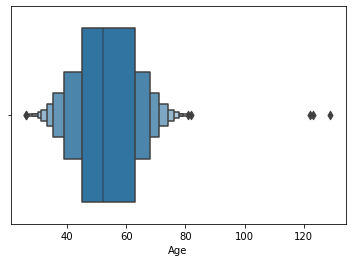

In [107]:
sns.boxenplot(df["Age"])

<AxesSubplot:xlabel='Income'>

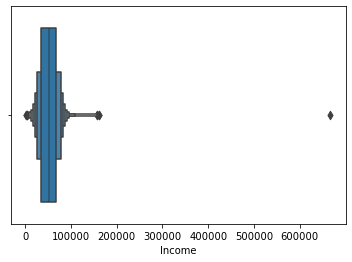

In [108]:
sns.boxenplot(df["Income"])

In [109]:
filt = ( df["Age"] <100 ) & (df["Income"] <600000  )
df=df.loc[filt]

In [110]:
df=df.reset_index().drop("index",1)

### Now dropping unnecessary columns

In [111]:
df=df.drop(["Year_Birth","Marital_Status","duration","Date","Dt_Customer"],1)

In [112]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Living_with,Children,Is_parent,Family_size,Total_spending,Customer_duration
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,Alone,0,0,1,1441,971
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,Alone,2,1,3,20,125
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,Partner,0,0,2,713,472
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,Partner,1,1,3,45,65
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,Partner,1,1,3,380,321


### Label encoding

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
enc1 = LabelEncoder()
enc2 = LabelEncoder()

In [115]:
df["Education"] = enc1.fit_transform(df["Education"])
df["Living_with"] = enc2.fit_transform(df["Living_with"])

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wine                 2212 non-null   int64  
 6   Fruit                2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweet                2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

### Now all the data is in numeric format

# Let's check for correlation

In [117]:
correlation = df.corr()

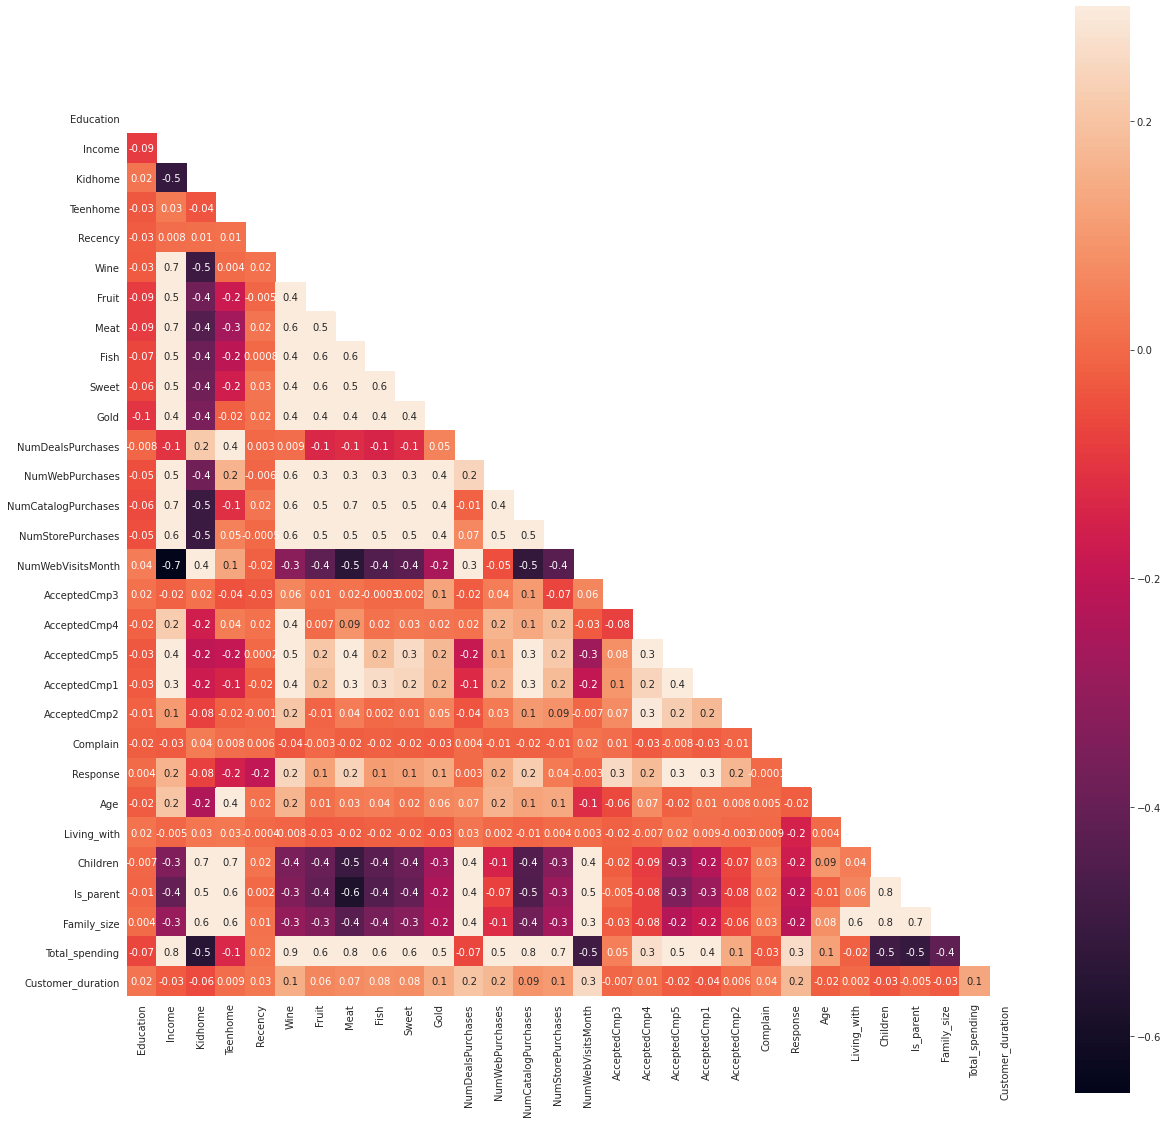

In [118]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,20))
    ax = sns.heatmap(correlation, mask=mask, vmax=.3, square=True,annot=True,fmt=".1g")

### Creating a dataframe before dimentionality reduction 

In [119]:
cust = df.copy()


### Dropping Deals and response columns  

In [120]:
cust.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine',
       'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Living_with', 'Children', 'Is_parent', 'Family_size', 'Total_spending',
       'Customer_duration'],
      dtype='object')

In [121]:
remove_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

In [122]:
cust= cust.drop(remove_cols,1)

In [123]:
cust.shape

(2212, 23)

# Let's do some EDA

In [124]:
cust.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine',
       'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Living_with', 'Children', 'Is_parent',
       'Family_size', 'Total_spending', 'Customer_duration'],
      dtype='object')

### We will be plotting data with respect to total spending and only relevant feature plotting will be done.
### For continuous data we will be using scatter plot and for categorical data bar plot

## Scatter plot

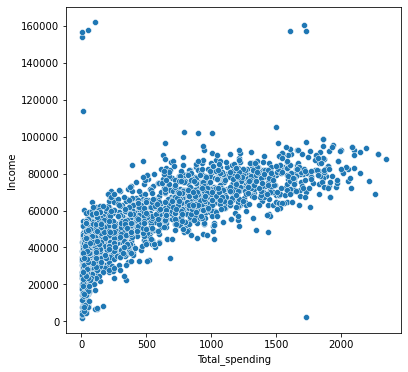

In [125]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=cust,x="Total_spending",y="Income")
plt.show()

### There is linear relationship present here 

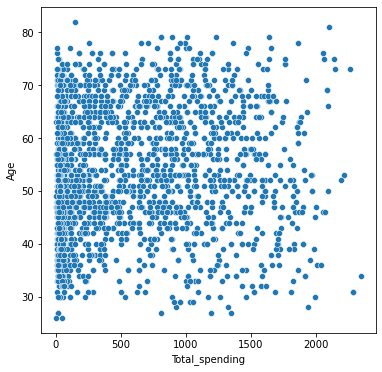

In [126]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=cust,x="Total_spending",y="Age")
plt.show()

### No linear linearship

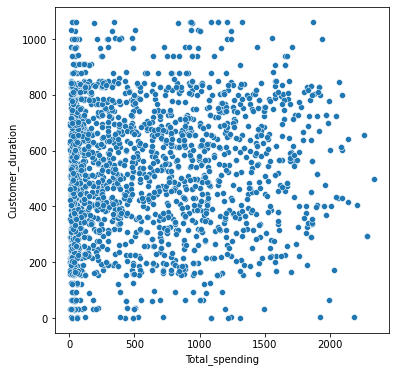

In [127]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=cust,x="Total_spending",y="Customer_duration")
plt.show()

### No linear relationship

In [128]:
cust.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine',
       'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Living_with', 'Children', 'Is_parent',
       'Family_size', 'Total_spending', 'Customer_duration'],
      dtype='object')

## Barplot

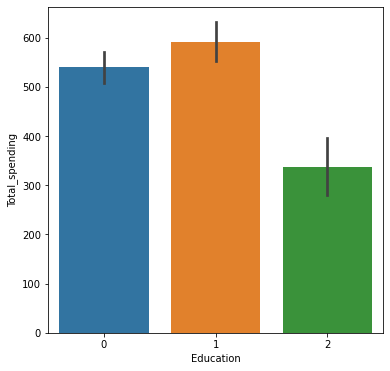

In [129]:
plt.figure(figsize=(6,6))
sns.barplot(data=cust,x="Education",y="Total_spending")
plt.show()

### 0: Graduate, 1: Postgraduate, 2:Undergraduate
----> Undergraduate spends less compared to others

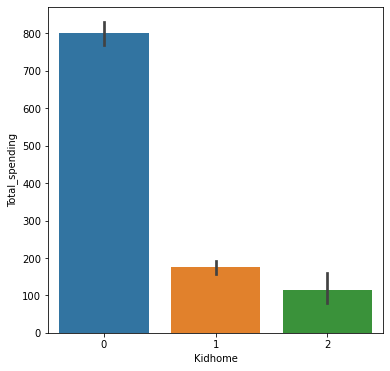

In [130]:
plt.figure(figsize=(6,6))
sns.barplot(data=cust,x="Kidhome",y="Total_spending")
plt.show()

### Customer with no kid_home tends to spend more than others

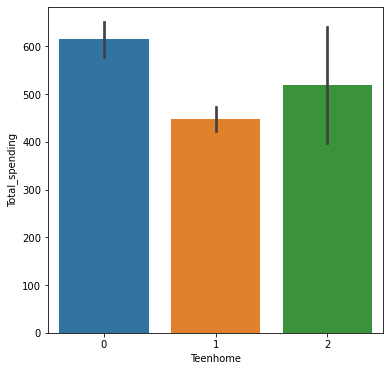

In [131]:
plt.figure(figsize=(6,6))
sns.barplot(data=cust,x="Teenhome",y="Total_spending")
plt.show()

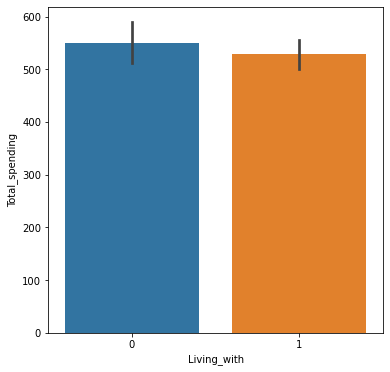

In [132]:
plt.figure(figsize=(6,6))
sns.barplot(data=cust,x="Living_with",y="Total_spending")
plt.show()

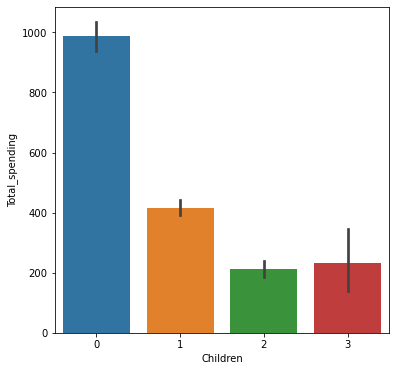

In [133]:
plt.figure(figsize=(6,6))
sns.barplot(data=cust,x="Children",y="Total_spending")
plt.show()

### Customer with no children spends more than others

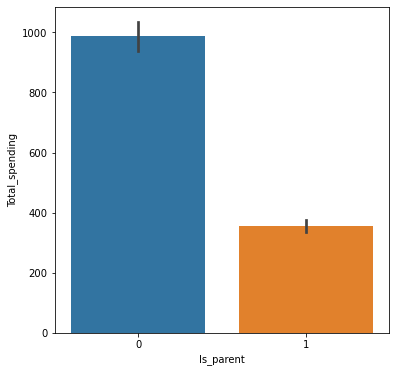

In [134]:
plt.figure(figsize=(6,6))
sns.barplot(data=cust,x="Is_parent",y="Total_spending")
plt.show()

### Same conclusion as for children

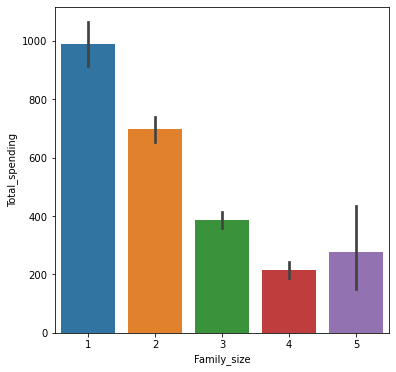

In [135]:
plt.figure(figsize=(6,6))
sns.barplot(data=cust,x="Family_size",y="Total_spending")
plt.show()

# Need to scale the data before feeding it to clustering algorithm

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()

In [138]:
scaled_cust = pd.DataFrame(scaler.fit_transform(cust),columns=cust.columns)

In [139]:
scaled_cust.head()

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruit,Meat,Fish,Sweet,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Living_with,Children,Is_parent,Family_size,Total_spending,Customer_duration
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,-1.349603,-1.264598,-1.581139,-1.758359,1.635802,1.973583
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-1.349603,1.404572,0.632456,0.449070,-0.933518,-1.665144
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.740959,-1.264598,-1.581139,-0.654644,0.319500,-0.172664
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,0.740959,0.069987,0.632456,0.449070,-0.888315,-1.923210
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,0.740959,0.069987,0.632456,0.449070,-0.282599,-0.822130


# There are many columns and many of them are correlated with each other so lets do dimentionality reduction before finding clusters

In [173]:
from sklearn.decomposition import PCA

#keeping 80% of explained variance
pca = PCA(n_components=0.8)



In [141]:
pca.fit_transform(scaled_cust).shape

(2212, 9)

In [142]:
scaled_pca = pd.DataFrame(pca.fit_transform(scaled_cust),columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"])

In [143]:
scaled_pca.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03
mean,-7.388103e-17,8.933983e-18,3.724166e-17,-1.680141e-17,3.673975e-17,2.001363e-18,5.121983e-17,1.525804e-17,6.534857e-17
std,2.872374e+00,1.706105e+00,1.221396e+00,1.146735e+00,1.054771e+00,1.004213e+00,9.750811e-01,9.314762e-01,8.779219e-01
min,-5.968112e+00,-4.310354e+00,-3.552594e+00,-3.119088e+00,-3.080859e+00,-2.271756e+00,-3.690311e+00,-4.426040e+00,-4.905507e+00
25%,-2.532171e+00,-1.328539e+00,-8.286664e-01,-7.682174e-01,-6.945707e-01,-8.315577e-01,-6.883352e-01,-5.093361e-01,-5.574175e-01
50%,-7.685025e-01,-1.608589e-01,-2.743036e-02,-1.159130e-02,-8.245200e-03,1.482318e-02,-4.296620e-02,6.061039e-02,-6.680565e-03
75%,2.375771e+00,1.241996e+00,8.099218e-01,8.905232e-01,7.388226e-01,8.102933e-01,6.561558e-01,5.564139e-01,5.594950e-01
max,7.412275e+00,6.145190e+00,6.614569e+00,3.377809e+00,3.118862e+00,2.433443e+00,3.933946e+00,4.913565e+00,5.533693e+00


In [144]:
pca.explained_variance_ratio_

array([0.35855652, 0.12649908, 0.06483193, 0.05714816, 0.04834948,
       0.04382557, 0.04131971, 0.03770677, 0.03349558])

In [145]:
scaled_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,4.978282,-0.153324,2.651633,-0.125358,-1.010608,-0.569224,-0.638673,-0.739577,2.002670
1,-2.873398,-0.005073,-1.856825,-1.505916,-1.759525,0.537067,0.125500,0.137076,0.754562
2,2.635658,-0.707582,-0.239631,-0.018366,0.597271,0.618585,-1.626106,0.100034,-0.701640
3,-2.664178,-1.543761,-0.941577,1.172383,-0.573691,1.052249,-0.491393,1.059246,-1.109018
4,-0.641485,0.211429,-0.033706,1.664598,-0.276859,-0.956815,1.402725,0.364039,-1.028658


In [146]:
scaled_pca.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03
mean,-7.388103e-17,8.933983e-18,3.724166e-17,-1.680141e-17,3.673975e-17,2.001363e-18,5.121983e-17,1.525804e-17,6.534857e-17
std,2.872374e+00,1.706105e+00,1.221396e+00,1.146735e+00,1.054771e+00,1.004213e+00,9.750811e-01,9.314762e-01,8.779219e-01
min,-5.968112e+00,-4.310354e+00,-3.552594e+00,-3.119088e+00,-3.080859e+00,-2.271756e+00,-3.690311e+00,-4.426040e+00,-4.905507e+00
25%,-2.532171e+00,-1.328539e+00,-8.286664e-01,-7.682174e-01,-6.945707e-01,-8.315577e-01,-6.883352e-01,-5.093361e-01,-5.574175e-01
50%,-7.685025e-01,-1.608589e-01,-2.743036e-02,-1.159130e-02,-8.245200e-03,1.482318e-02,-4.296620e-02,6.061039e-02,-6.680565e-03
75%,2.375771e+00,1.241996e+00,8.099218e-01,8.905232e-01,7.388226e-01,8.102933e-01,6.561558e-01,5.564139e-01,5.594950e-01
max,7.412275e+00,6.145190e+00,6.614569e+00,3.377809e+00,3.118862e+00,2.433443e+00,3.933946e+00,4.913565e+00,5.533693e+00


In [147]:
a=scaled_pca["PCA1"]
b=scaled_pca["PCA2"]
c=scaled_pca["PCA3"]


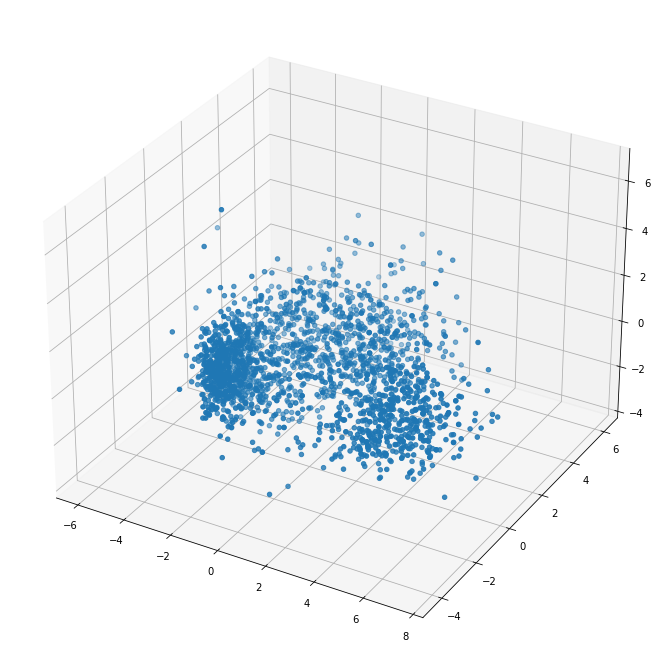

In [148]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(a,b,c, marker="o" )
plt.show()

# Let's do clustering

In [149]:
cls_data_1 =scaled_pca[["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]]

In [150]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

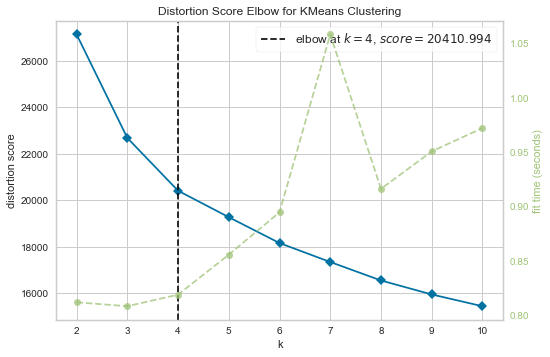

In [151]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(cls_data_1)
elbow.show()
plt.show()

### Automated library for elbow plot says that 4 clusters are best and visually also k = 4 looks good  

### Let's check for silhoutte score plot

In [152]:
from sklearn.metrics import silhouette_score

In [153]:
from yellowbrick.cluster import SilhouetteVisualizer

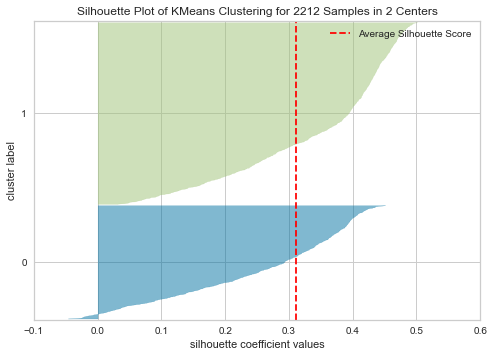

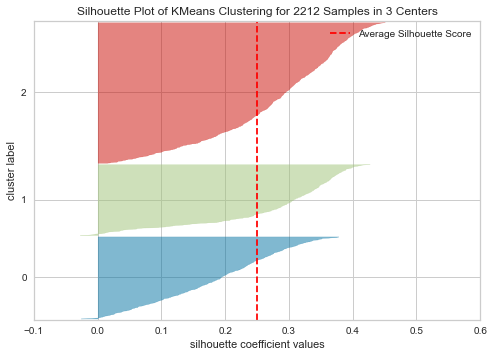

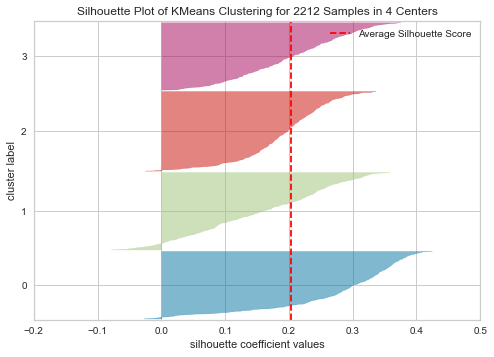

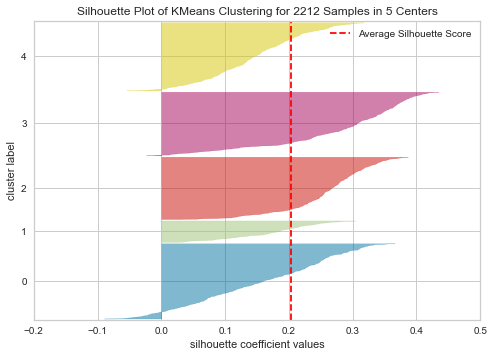

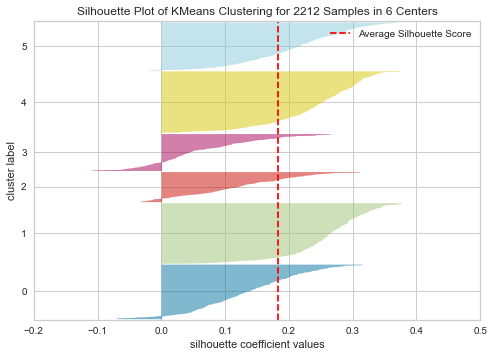

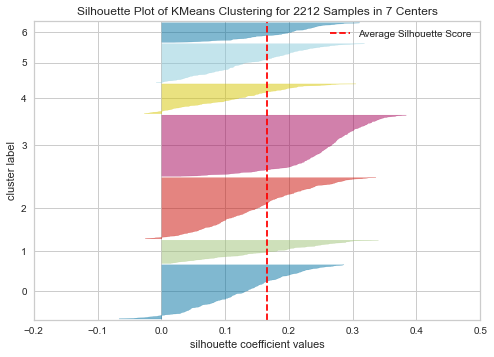

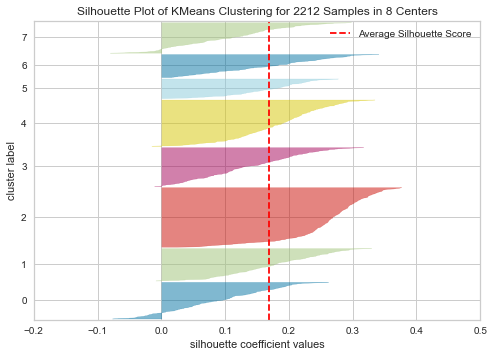

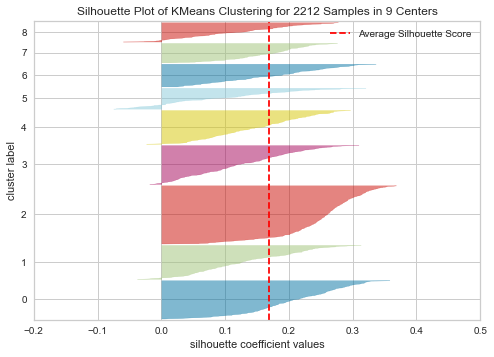

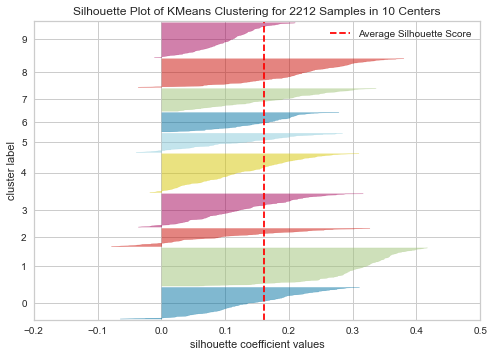

In [154]:
sil_scr=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(cls_data_1)
    sil_scr.append(silhouette_score(cls_data_1,clusters))
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(cls_data_1)        
    visualizer.show()   

### For k=3  the cluster 2 looks big, The cluster size looks similar for all clusters when k = 4. 

In [155]:
k = range(2,11)

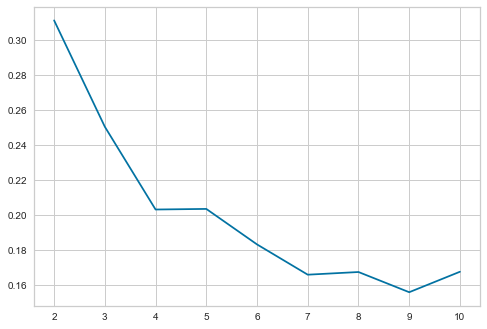

In [156]:
plt.plot(k,sil_scr)
plt.show()

### So, choosing k = 4 

In [157]:
kmeans = KMeans(n_clusters=4,random_state=100)
clusters = kmeans.fit_predict(cls_data_1)
scaled_pca["Cluster"] = clusters
cust["Cluster"] =clusters

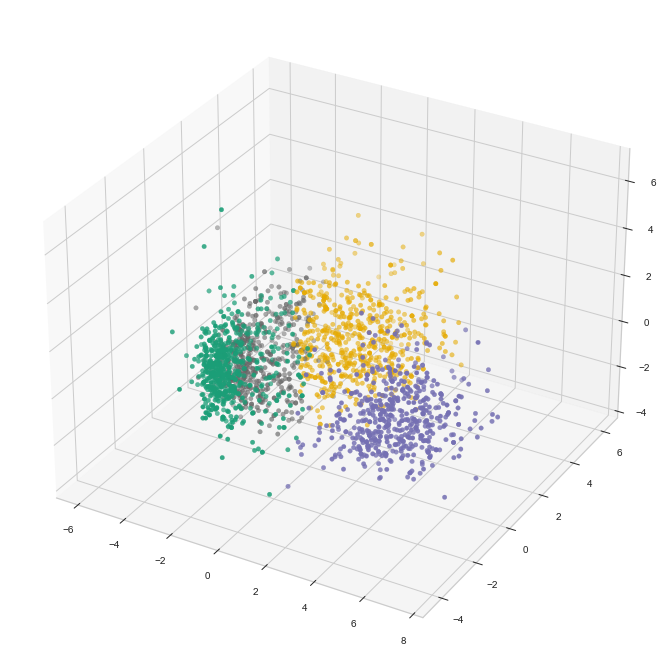

In [158]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(a,b,c,c=scaled_pca["Cluster"], marker="o" ,cmap="Dark2")
plt.show()

### Let's check cluster size 

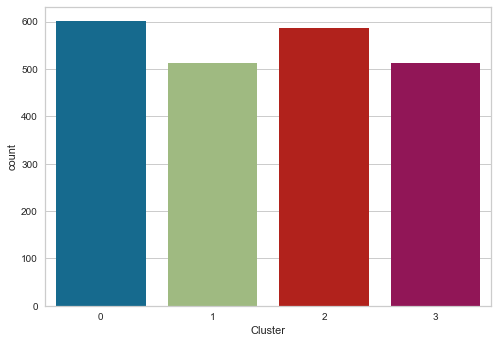

In [159]:
sns.countplot(scaled_pca["Cluster"])
plt.show()

### Cluster size for all clusters, more or less looks similar

### Let's check clusters on income and spent scatter plot

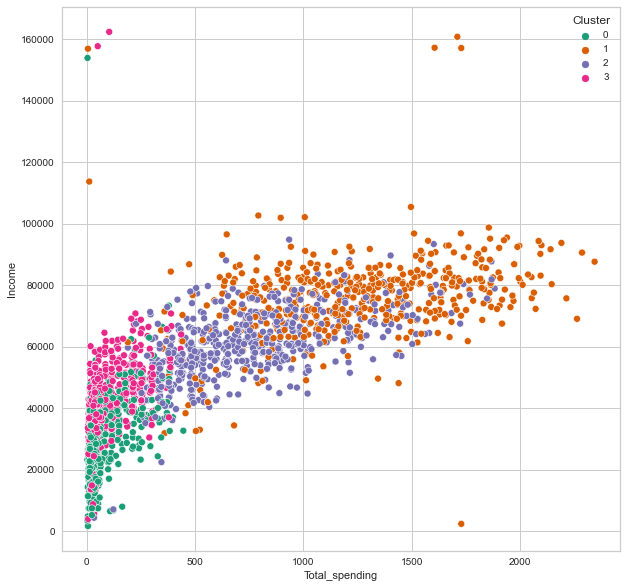

In [160]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cust,x="Total_spending",y="Income",hue="Cluster",palette="Dark2")
plt.show()

# This plot reveals that there are Majorly 4 customer segments 

## 0: Low income low spending
## 1: High income high spending
## 2: Medium income medium-high spending
## 3: Medium income low spending

# Now let's look at spending volume for each cluster

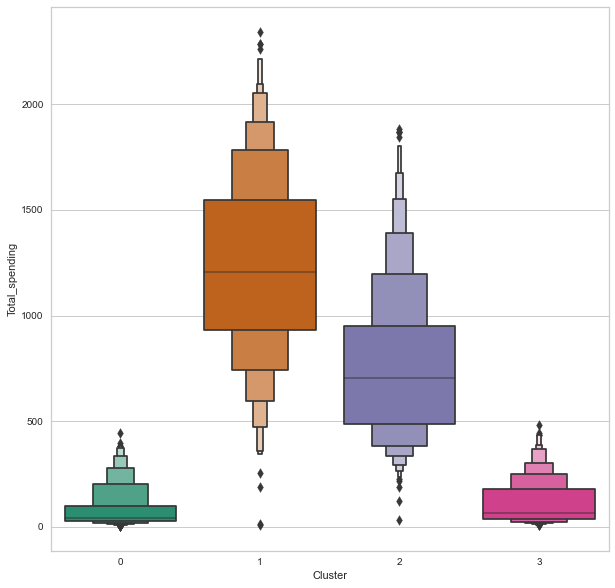

In [161]:
plt.figure(figsize=(10,10))
sns.boxenplot(data=cust,y="Total_spending",x="Cluster",palette="Dark2")
plt.show()

## The above plot shows that cluster 1 is biggest customer segment for us and cluster 2 is second biggest customer segment 

## Promotions analysis

In [162]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine',
       'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Living_with', 'Children', 'Is_parent', 'Family_size', 'Total_spending',
       'Customer_duration'],
      dtype='object')

In [163]:
cust["all_promotions"] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

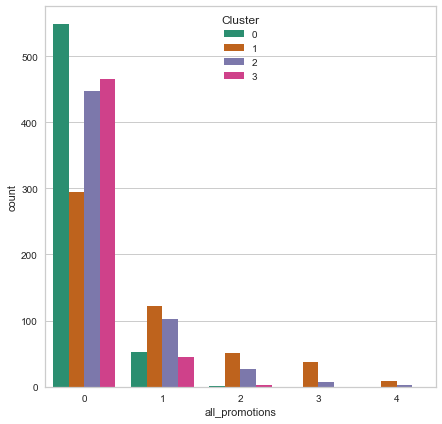

In [164]:
plt.figure(figsize=(7,7))
sns.countplot(data=cust,x="all_promotions",hue="Cluster",palette="Dark2")
plt.show()

### The promotion acceptance is very low for all the clusters

## Now checkling purchase analysis

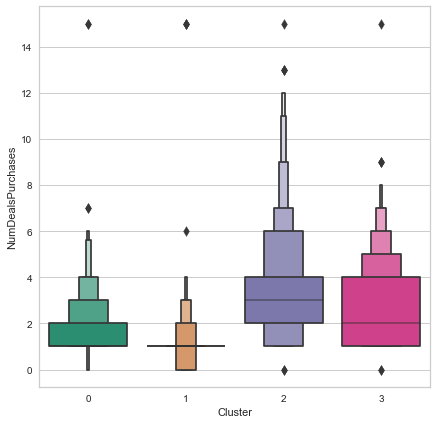

In [165]:
plt.figure(figsize=(7,7))
sns.boxenplot(data=cust,y="NumDealsPurchases",x="Cluster",palette="Dark2")
plt.show()

###  Most deals are purchased by cluster 2, followed by cluster 3  

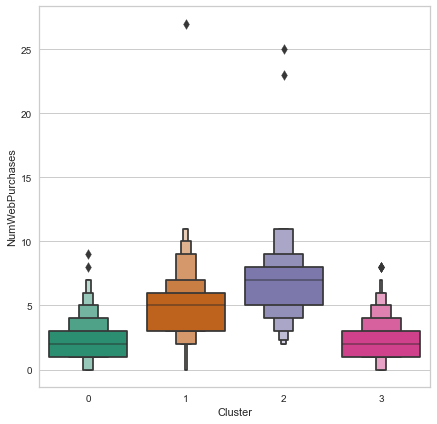

In [166]:
plt.figure(figsize=(7,7))
sns.boxenplot(data=cust,y="NumWebPurchases",x="Cluster",palette="Dark2")
plt.show()

###  Most web based purchase are by cluster 2, followed by cluster 1  

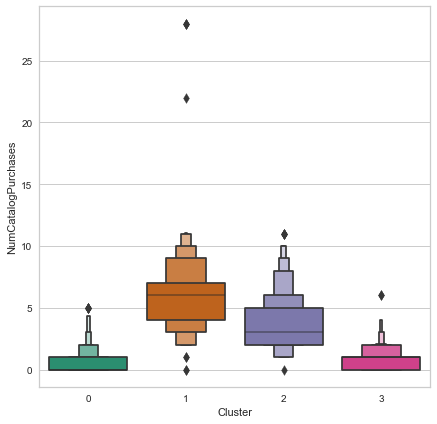

In [167]:
plt.figure(figsize=(7,7))
sns.boxenplot(data=cust,y="NumCatalogPurchases",x="Cluster",palette="Dark2")
plt.show()

###  Most catalog based purchase are by cluster 1, followed by cluster 2 

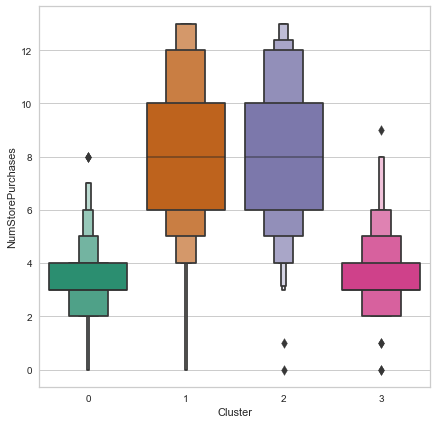

In [168]:
plt.figure(figsize=(7,7))
sns.boxenplot(data=cust,y="NumStorePurchases",x="Cluster",palette="Dark2")
plt.show()

###  Most store based purchases are by cluster 1 and 2 

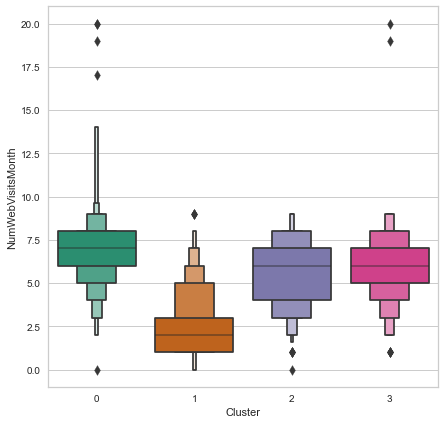

In [169]:
plt.figure(figsize=(7,7))
sns.boxenplot(data=cust,y="NumWebVisitsMonth",x="Cluster",palette="Dark2")
plt.show()

###  Most website visits per month are by cluster 0 and 3, although  most website based purchases are by cluster 2 and 1

# Now let's find out hidden information about each cluster based on their personal attributes

In [170]:
cust.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine',
       'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Living_with', 'Children', 'Is_parent',
       'Family_size', 'Total_spending', 'Customer_duration', 'Cluster',
       'all_promotions'],
      dtype='object')

In [171]:
personal_attrs = ['Education', 'Income', 'Kidhome', 'Teenhome', 'Age', 'Living_with', 'Children', 'Is_parent',
       'Family_size','Customer_duration']

<Figure size 432x432 with 0 Axes>

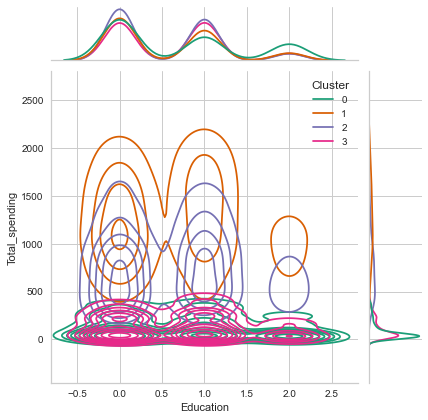

<Figure size 432x432 with 0 Axes>

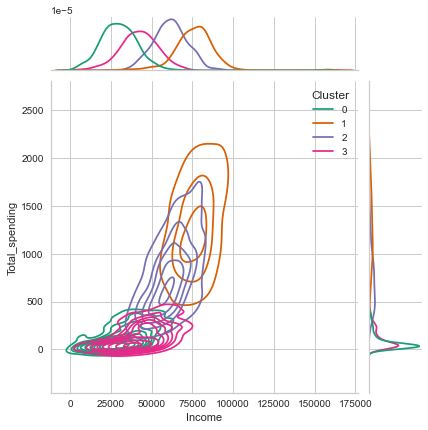

<Figure size 432x432 with 0 Axes>

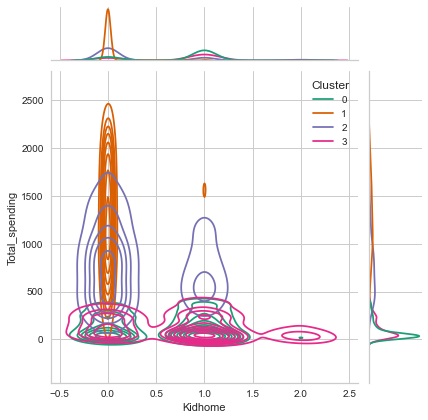

<Figure size 432x432 with 0 Axes>

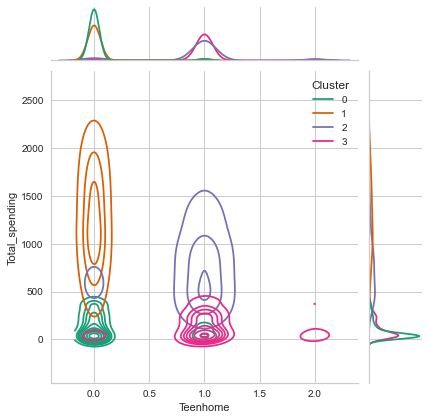

<Figure size 432x432 with 0 Axes>

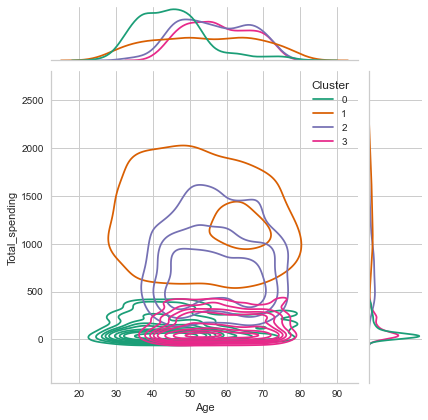

<Figure size 432x432 with 0 Axes>

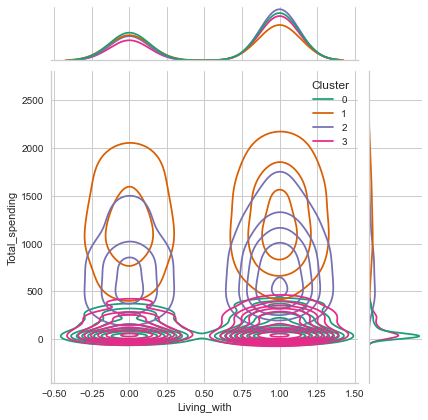

<Figure size 432x432 with 0 Axes>

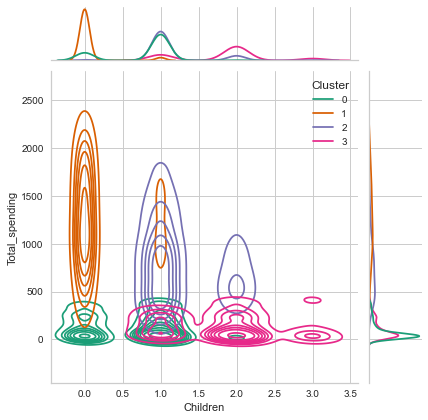

<Figure size 432x432 with 0 Axes>

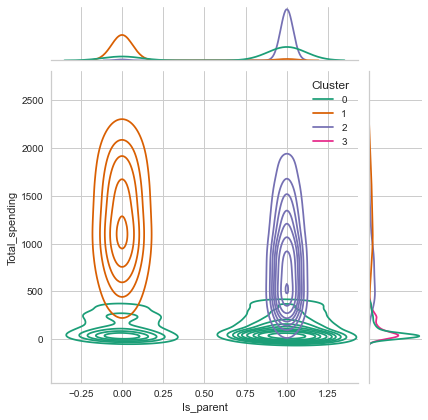

<Figure size 432x432 with 0 Axes>

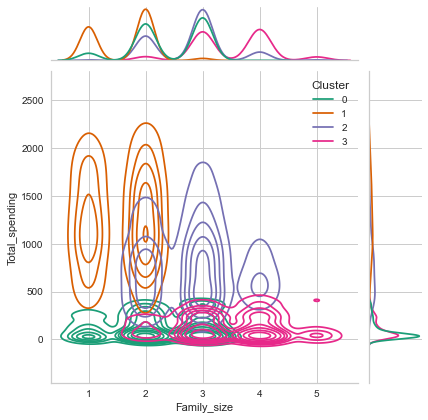

<Figure size 432x432 with 0 Axes>

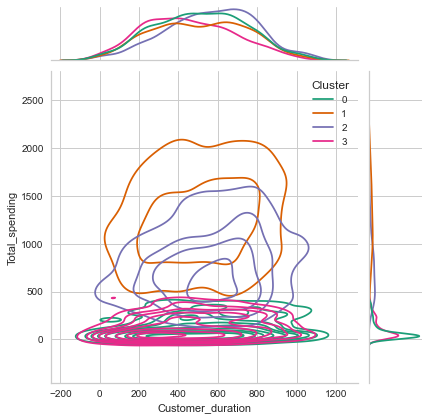

In [172]:
for attr in personal_attrs:
    plt.figure(figsize=(6,6))
    sns.jointplot(x=cust[attr],y=cust["Total_spending"],hue =cust["Cluster"], kind="kde", palette="Dark2")
    plt.show()

# Conclusions for each clusters


## Cluster 0 --->
### Low income low spending group
### Comparatively younger
### 0 or 1 child
### Majority living with partner
### Majority are parent
### Family size 1 to 3



## Cluster 1 --->
### High income high spending group
### No children 
### All age range
### More people living with partner than alone
### Definitely  not a parent
### Family size  1 to 2


## Cluster 2 --->
### Medium income medium-high spending group
### Majority have 1 teen at home
### Comparatively high aged
### 1 - 2 children
### Definitely  a parent
### Family size 2 to 4


## Cluster 3 --->
### Medium income low spending group
### Comparatively high aged
### Majority living with partner
### 1 to 3 children
### Family size 3 to 5





